In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance


In [18]:
means = [[2,2], [8,2], [5,7]]
cov = [[0.5,0], [0,0.5]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)            #cụm 1
X1 = np.random.multivariate_normal(means[1], cov, N)            # cụm 2
X2 = np.random.multivariate_normal(means[2], cov, N)            # cụm 3
K = 3                                                           # 3 cụm
X = np.concatenate((X0, X1, X2), axis = 0 )             # xếp chồng lên nhau
label = np.asarray([0]*N + [1]*N + [2]*N).T

In [19]:
label.shape

(1500,)

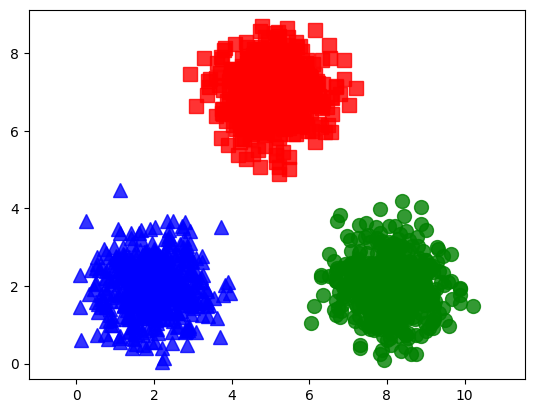

In [56]:
def Kmeans_visualize(X,label):
    X0 = X[label == 0 ]
    X1 = X[label == 1 ]
    X2 = X[label == 2 ]

    plt.plot(X0[:,0], X0[:,1], 'b^',markersize = 10, alpha = 0.8, label = 'cluster1')
    plt.plot(X1[:,0], X1[:,1], 'go',markersize = 10, alpha = 0.8, label = 'cluster1')
    plt.plot(X2[:,0], X2[:,1], 'rs',markersize = 10, alpha = 0.8, label = 'cluster1')

    plt.axis('equal')
    plt.plot()
    plt.show()

Kmeans_visualize(X,label)

## Thuật toán K-Means (K-Means Clustering)

**Mục tiêu.** Phân nhóm dữ liệu thành *K* cụm sao cho các điểm trong cùng cụm giống nhau nhất và khác các cụm khác.


### Các bước

**Bước 1 — Khởi tạo (Initialization).**
Chọn ngẫu nhiên *K* tâm cụm ban đầu từ tập dữ liệu, ký hiệu $\,\mu_1,\mu_2,\ldots,\mu_K$.

**Bước 2 — Phân cụm (Assignment).**
Gán mỗi điểm $x_i$ vào cụm có tâm gần nhất:
$$
C_i=\arg\min_{k\in\{1,\ldots,K\}}\lVert x_i-\mu_k\rVert^2.
$$

**Bước 3 — Cập nhật tâm cụm (Update).**
Tính lại tâm mỗi cụm bằng trung bình các điểm trong cụm:
$$
\mu_k=\frac{1}{|C_k|}\sum_{x_i\in C_k} x_i.
$$

**Bước 4 — Kiểm tra hội tụ (Convergence).**
Lặp lại Bước 2–3 đến khi các tâm thay đổi rất nhỏ hoặc hàm mục tiêu không còn giảm:
$$
J=\sum_{k=1}^{K}\sum_{x_i\in C_k}\lVert x_i-\mu_k\rVert^2.
$$



In [77]:
def centroid_initialize(X,K):
    #chọn ngẫu nhiên K điểm trong data làm centroid
    idx =  np.random.choice(X.shape[0], K, replace = False)           # trả về các index của các điểm được chọn ngẫu nhiên từ X
    centroids = X[idx]
    return centroids

def assign_cluster(X, centroids):
    # trả về thông tin data point xi thuộc về cluster nào phụ thuộc vào khoảng cách gần centroid nào nhất
    cluters = np.zeros(X.shape[0], dtype = int)
    for i,x in enumerate(X):
        min_dist = float('inf')         #ban đầu giả sử cho min = vô cực
        for j in range(len(centroids)):
            dist = distance.euclidean(x,centroids[j])
            if dist < min_dist:
                min_dist = dist
                cluters[i] = j                      # gán nhãn cluster cho data point x

    return cluters

def update_centroid(X,K, centroids, clusters):
    # cập nhật lại tâm cụm (centroid)
    for i in range(K):
        centroids[i] = np.mean(X[clusters == i], axis = 0)          #cập nhật centroids mới
def check_convergence(old_centroids,centroids):
    return np.allclose(old_centroids, centroids, atol=1e-6)          # trả về true nếu tâm cũ và tâm mới không đổi hay
                                                                    # đã convergence

In [78]:
def Kmeans(X,K):
    centroids = centroid_initialize(X,K)                # khởi tạo K centroid ngẫu nhiên
    while True:
        old_centroids = centroids
        clusters = assign_cluster(X,centroids)         # phân cụm dựa trên centroid
        update_centroid(X,K, centroids, clusters)
        if check_convergence(old_centroids,centroids):      #check xem đã convergence hay chưa nếu chưa thì tiếp tục
            break

    return centroids, clusters                # trả về centroid cuối cùng khi đã convergence

In [79]:
centroids, clusters = Kmeans(X,3)

In [80]:
centroids

array([[2.0954369 , 2.38471965],
       [8.29638842, 1.85591316],
       [5.51959768, 6.16536679]])

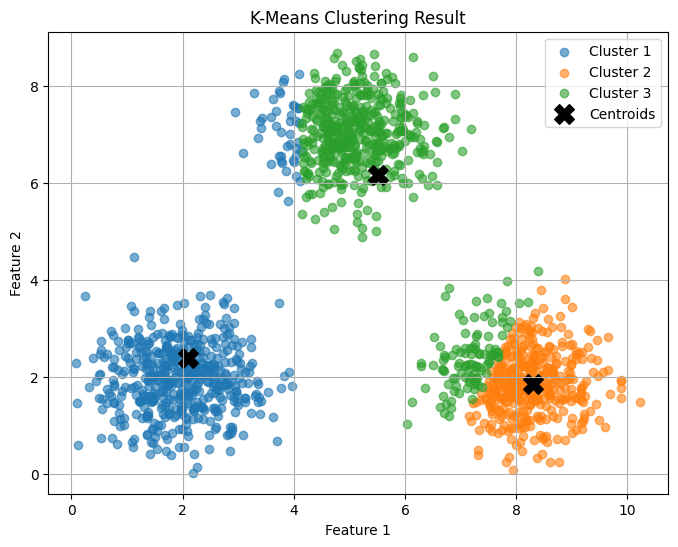

In [81]:
def visualize_clusters(X, clusters, centroids):
    K = len(centroids)
    plt.figure(figsize=(8,6))

    # Vẽ từng cụm với màu khác nhau
    for i in range(K):
        plt.scatter(
            X[clusters == i, 0],
            X[clusters == i, 1],
            label=f'Cluster {i+1}',
            alpha=0.6
        )

    # Vẽ tâm cụm
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        s=200, c='black', marker='X', label='Centroids'
    )

    plt.title('K-Means Clustering Result')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_clusters(X,clusters, centroids)